# Task 1 - EDA (Explaratory Data Analysis)

## Subtask 1 - Connection to DB

Here we import the necessary modules, as well as a custom connection to database function from src/commonfunctions.py 

Purpose is to improve code readbility and reusability throughout the assessment. 

In [46]:
import pandas as pd
import matplotlib.pyplot as plt 
from src.databaseconnect import ConnectToDB

Connecting to the Database in data\survive.db and then executing the query and saving the results to a dataframe in pandas.

In [47]:
pathtodb = 'data\survive.db'

df = pd.read_sql_query("SELECT * from survive", ConnectToDB(pathtodb))

# Verify that result of SQL query is stored in the dataframe
df


Database created and Successfully Connected to SQLite


,ID,Survive,Gender,Smoke,Diabetes,Age,Ejection Fraction,Sodium,Creatinine,Pletelets,Creatinine phosphokinase,Blood Pressure,Hemoglobin,Height,Weight,Favorite color
0,TIG1GE,0,Male,Yes,Normal,50,Low,141,0.7,266000.0,185,105,12.3,180,93,green
1,VXUCV9,1,Male,No,Normal,75,Low,134,2.5,224000.0,99,162,13.0,140,47,black
2,AFH4F1,1,Female,No,Pre-diabetes,80,Low,135,1.3,192000.0,776,179,12.4,150,61,white
3,ZK6PAC,0,Male,No,Normal,-60,Low,136,0.9,228000.0,2261,136,15.3,130,48,yellow
4,6CVBRT,0,Female,No,Normal,70,Low,141,0.9,358000.0,1202,171,13.3,177,64,blue
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,91MBFV,0,Male,Yes,Normal,50,Low,140,0.9,362000.0,298,109,11.8,178,51,blue
14996,3BK9WM,1,Male,Yes,Normal,62,Low,140,0.9,253000.0,231,141,14.6,171,114,green
14997,01ZP6F,0,Female,No,Normal,61,Low,141,0.9,229000.0,84,173,9.2,156,71,blue
14998,JMSGEG,0,Male,No,Normal,77,Low,137,1.1,406000.0,109,154,11.3,130,32,red


## Subtask 2 - Initial EDA

16 columns with 15000 rows are recorded as the shape of the df, also platelets are wrongly spelt? We see below that there are no rows with missing values except for the Creatinine column. 

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        15000 non-null  object 
 1   Survive                   15000 non-null  object 
 2   Gender                    15000 non-null  object 
 3   Smoke                     15000 non-null  object 
 4   Diabetes                  15000 non-null  object 
 5   Age                       15000 non-null  int64  
 6   Ejection Fraction         15000 non-null  object 
 7   Sodium                    15000 non-null  int64  
 8   Creatinine                14501 non-null  float64
 9   Pletelets                 15000 non-null  float64
 10  Creatinine phosphokinase  15000 non-null  int64  
 11  Blood Pressure            15000 non-null  int64  
 12  Hemoglobin                15000 non-null  float64
 13  Height                    15000 non-null  int64  
 14  Weight

This is where the real trouble starts, we find that the columns contain dubious and ambigious data, for eg. Survive column has 4 values when it should be a boolean value and ID contains only 14042 unique entries, which means some IDs have been duplicated. Below we also write a log of the summary of data in data/Dataset_summary.txt for your reference. Please head over to that section to find out more detailed summary. 

In [49]:
df.nunique()

ID                          14042
Survive                         4
Gender                          2
Smoke                           4
Diabetes                        3
Age                            87
Ejection Fraction               5
Sodium                         27
Creatinine                     40
Pletelets                     176
Creatinine phosphokinase      208
Blood Pressure                139
Hemoglobin                     86
Height                         60
Weight                        123
Favorite color                  6
dtype: int64

In [50]:
file = open("data/Dataset_Summary.txt","r+")
file.truncate(0)
file.close()

for column in df:
    file = open("data/Dataset_Summary.txt","a")
    file.write(str(df[column].value_counts()))
    file.write('\n')
    file.write('='*20)
    file.write('\n')
    file.close()

## Subtask 3 - Data Cleaning

ETL Pipeline #1
Going sequentially, column by columns we start with the first column for ID - i will assume that any subsequent entry with the same ID is an error and treat it as such. 

In [51]:
cleaned_df = df.copy(deep= True)
#ETL Pipeline Number 1 
cleaned_df.drop_duplicates(subset ="ID", keep = 'first', inplace = True) 

ETL Pipeline #2 Survive Column contains mix of 0 and 1 boolean and Yes and No 

In [52]:
cleaned_df.Survive = cleaned_df.Survive.map({'Yes':'Yes', 'No':'No', '1':'Yes','0':'No'})


ETL Pipeline #4 Change Smoke cat to all upper case then boolean encode yes and no values

In [53]:
cleaned_df['Smoke'] = cleaned_df['Smoke'].str.upper()  

#cleaned_df.Smoke = cleaned_df.Smoke.map({'YES':1,'NO':0})

ETL Pipeline #5 Remove Erranous Age values for eg. Negative ages and ages > 100 

In [54]:
cleaned_df = cleaned_df[cleaned_df.Age >0]  
cleaned_df = cleaned_df[cleaned_df.Age < 100 ]

ETL Pipeline #6 Changing Ejection Fraction to Low High and Normal

In [55]:
cleaned_df['Ejection Fraction'] = cleaned_df['Ejection Fraction'].map({'Low':'Low','Normal':'Normal','High':'High','L':'Low','N':'Normal'})

ETL Pipeline #7 Filling in missing values for Creatinine 

In [56]:
cleaned_df = cleaned_df.fillna(method="ffill")

In [57]:
cleaned_df.to_csv(r'data/Cleaned_Data.csv')

## Subtask 4 - Data Visualizations of Dataset (Histograms etc.)


Interactive Data Visualizations 

Just ploting all numerical columns across the dataset - as good practice

array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>], dtype=object)

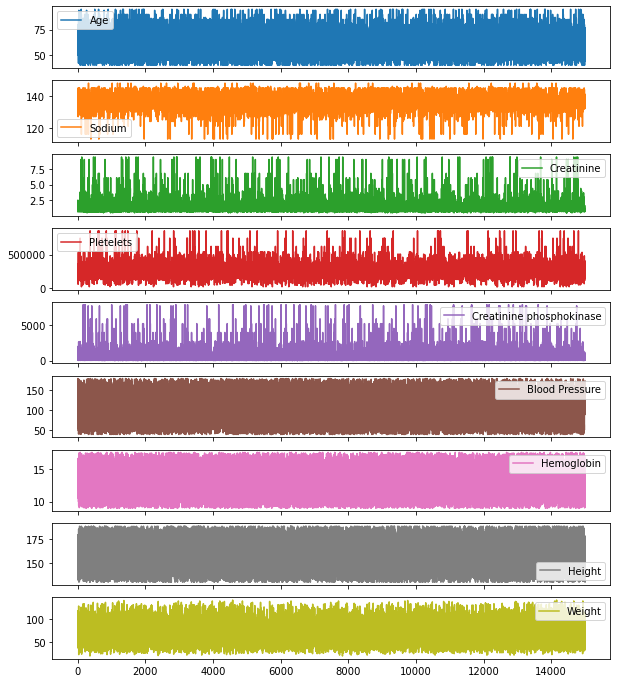

In [58]:
cleaned_df.plot(subplots=True, figsize=(10,12))

Plotting Histograms to get a better visualization of the data

array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Sodium'}>,
        <AxesSubplot:title={'center':'Creatinine'}>],
       [<AxesSubplot:title={'center':'Pletelets'}>,
        <AxesSubplot:title={'center':'Creatinine phosphokinase'}>,
        <AxesSubplot:title={'center':'Blood Pressure'}>],
       [<AxesSubplot:title={'center':'Hemoglobin'}>,
        <AxesSubplot:title={'center':'Height'}>,
        <AxesSubplot:title={'center':'Weight'}>]], dtype=object)

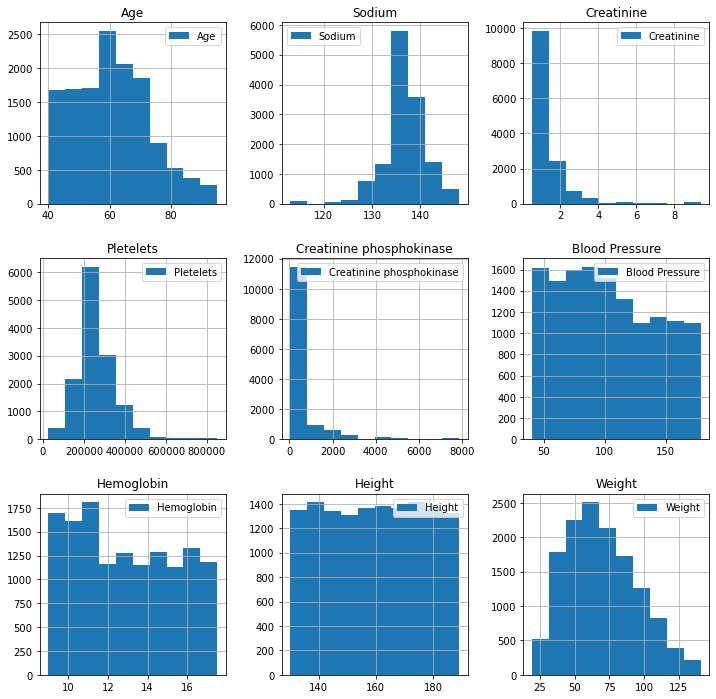

In [59]:
cleaned_df.hist(legend=True,figsize=(12,12))

Correlation Matrix of Dataset Amongst Numerical Data

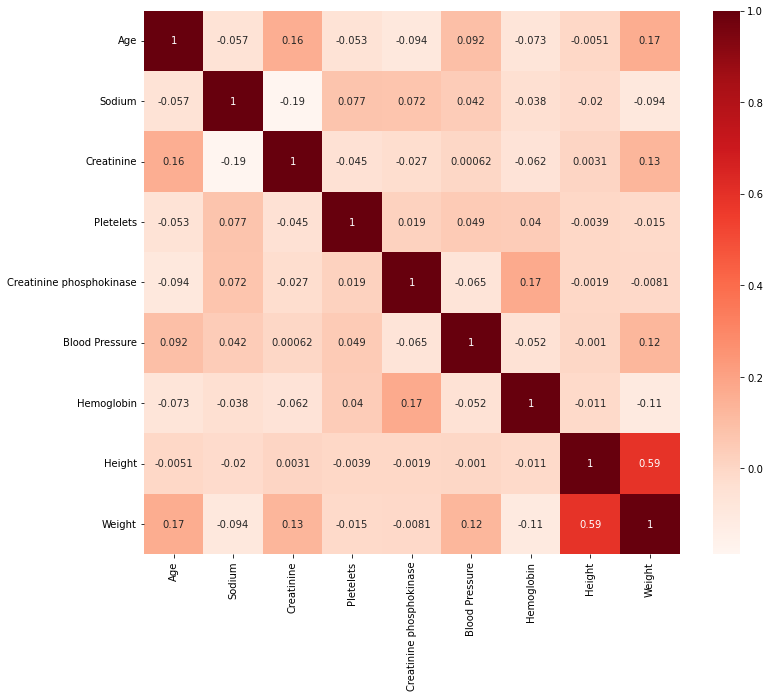

In [60]:
import seaborn as sns 

plt.figure(figsize=(12,10))
cor = cleaned_df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

# Task 2 Machine Learning 

## SubTask 1 Data Encoding - Converting Categorical Features Using One Hot Encoding and Converting Numerical Features using Standard Scaling

In [61]:
target_name = "Survive"
target = cleaned_df[target_name]

dataset = cleaned_df.drop(columns=[target_name,"ID"])

In [62]:
from sklearn.compose import make_column_selector as selector

numerical_columns_selector = selector(dtype_exclude=object)
categorical_columns_selector = selector(dtype_include=object)

numerical_columns = numerical_columns_selector(dataset)
categorical_columns = categorical_columns_selector(dataset)

In [63]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler

categorical_preprocessor = OneHotEncoder(handle_unknown="ignore")
numerical_preprocessor = StandardScaler()

In [64]:
from sklearn.compose import ColumnTransformer

preprocessor = ColumnTransformer([
    ('one-hot-encoder', categorical_preprocessor, categorical_columns),
    ('standard_scaler', numerical_preprocessor, numerical_columns)])

## Subtask 2 - Model 1: Logistic Regression

In [65]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline

model = make_pipeline(preprocessor, LogisticRegression(max_iter=500))

For the Log Regression model - this will be the sklearn pipeline we will use: We will transform Categorical Values using One Hot Encoder and then passing numerical values into standard scaler both provided in sklearn and then recombining them to give us our transformed dataset, ready for machine learning.

In [66]:
from sklearn import set_config
set_config(display='diagram')
model

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('one-hot-encoder',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Gender', 'Smoke',
                                                   'Diabetes',
                                                   'Ejection Fraction',
                                                   'Favorite color']),
                                                 ('standard_scaler',
                                                  StandardScaler(),
                                                  ['Age', 'Sodium',
                                                   'Creatinine', 'Pletelets',
                                                   'Creatinine phosphokinase',
                                                   'Blood Pressure',
                                                   'Hemoglobin', 'Height',
                                                   'Weight'])])),
                ('logisticregression', LogisticRegression(max_iter=500))])

Here we use sklearn train_test_split to split the dataset according to random seeds for our training and testing purposes. 

In [67]:
from sklearn.model_selection import train_test_split

data_train, data_test, target_train, target_test = train_test_split(
    dataset, target, random_state=42)

Fitting the model AKA the "Machine Learning"

In [68]:
_= model.fit(data_train, target_train)


Viewing the top 5 rows of the testing data without the target variable

In [69]:
data_test.head()


,Gender,Smoke,Diabetes,Age,Ejection Fraction,Sodium,Creatinine,Pletelets,Creatinine phosphokinase,Blood Pressure,Hemoglobin,Height,Weight,Favorite color
10724,Female,YES,Diabetes,50,Low,136,1.2,153000.0,124,129,12.4,138,70,yellow
7987,Male,NO,Diabetes,65,Low,129,1.4,198000.0,258,57,9.5,180,53,green
3432,Male,NO,Normal,85,Low,132,3.0,360000.0,23,48,15.1,130,63,blue
14328,Male,NO,Diabetes,50,Low,136,1.6,252000.0,369,51,15.2,178,98,red
8852,Male,YES,Normal,42,Low,140,1.0,226000.0,5209,107,17.4,183,105,green


Compare the predicted values seen in this with the actual values below

In [70]:
model.predict(data_test)[:5]


array(['Yes', 'No', 'Yes', 'No', 'No'], dtype=object)

In [71]:
target_test[:5]


10724    Yes
7987     Yes
3432     Yes
14328     No
8852      No
Name: Survive, dtype: object

Evaluation Metric Used #1: Accuracy - The accuracy_score function computes the accuracy, either the fraction (default) or the count (normalize=False) of correct predictions.

In multilabel classification, the function returns the subset accuracy. If the entire set of predicted labels for a sample strictly match with the true set of labels, then the subset accuracy is 1.0; otherwise it is 0.0.


In [72]:
from sklearn import metrics
from sklearn.metrics import classification_report, RocCurveDisplay, confusion_matrix

model.score(data_test, target_test)


0.8316715542521994

Evaluation Metric Used #2: Confusion Matrix - this metric evaluates the true positives, false positives, true negatives and false negatives.

In [73]:
cm = confusion_matrix(target, model.predict(dataset), labels=model.classes_)
print(cm[0][0]/(cm[0][0]+cm[0][1])) 

0.9059422015369629


Evaluation Metric Used #3: Receiver Operator Characteristic (AOC)

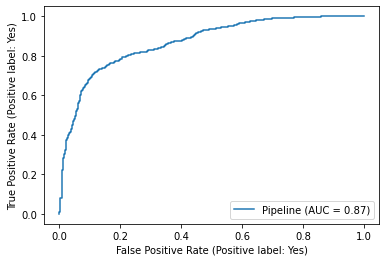

In [74]:
RocCurveDisplay.from_estimator(model, data_test, target_test)
plt.show()

## Subtask 3 - Model 2: Random Forest Classifier

Rehash of Model 1 Processing steps except instead of one hot encoder we are using ordinal encoder.

In [75]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OrdinalEncoder

categorical_preprocessor = OrdinalEncoder(handle_unknown="use_encoded_value",
                                          unknown_value=-1)

preprocessor = ColumnTransformer([
    ('categorical', categorical_preprocessor, categorical_columns)],
    remainder="passthrough")

model = make_pipeline(preprocessor, RandomForestClassifier())

In [76]:
%%time
model = model.fit(data_train, target_train)

Wall time: 592 ms


In [77]:
model

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('categorical',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['Gender', 'Smoke',
                                                   'Diabetes',
                                                   'Ejection Fraction',
                                                   'Favorite color'])])),
                ('randomforestclassifier', RandomForestClassifier())])

Metric #1 - Accuracy: For more info, use the CLI tool provided by running run.sh for the full classification report details 

In [78]:
model.score(data_test, target_test)

0.9991202346041056

Predicting first 5 values in the testing dataset.

In [79]:
model.predict(data_test)[:5]

array(['Yes', 'Yes', 'Yes', 'No', 'No'], dtype=object)

## Subtask 4 - Model 3: Gradient Boosting

In [80]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import OrdinalEncoder

categorical_preprocessor = OrdinalEncoder(handle_unknown="use_encoded_value",
                                          unknown_value=-1)

preprocessor = ColumnTransformer([
    ('categorical', categorical_preprocessor, categorical_columns)],
    remainder="passthrough")

model = make_pipeline(preprocessor, GradientBoostingClassifier())

In [81]:
model

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('categorical',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['Gender', 'Smoke',
                                                   'Diabetes',
                                                   'Ejection Fraction',
                                                   'Favorite color'])])),
                ('gradientboostingclassifier', GradientBoostingClassifier())])

In [82]:
%%time
model = model.fit(data_train, target_train)

Wall time: 1 s


In [83]:
model.score(data_test, target_test)

0.9463343108504398

In [84]:
model.predict(data_test)[:5]

array(['Yes', 'Yes', 'Yes', 'No', 'No'], dtype=object)

Predicted probability of the first 5 rows in the testing dataset - First element is "No" and Second Element is "Yes" with the respective probabilities

In [85]:
model.predict_proba(data_test)[:5]

array([[0.1166394 , 0.8833606 ],
       [0.47365413, 0.52634587],
       [0.14461514, 0.85538486],
       [0.65285772, 0.34714228],
       [0.84141712, 0.15858288]])

Metric #1 - Full classification report

In [86]:
print(classification_report(target,model.predict(dataset)))

              precision    recall  f1-score   support

          No       0.95      0.99      0.97      9239
         Yes       0.97      0.89      0.93      4400

    accuracy                           0.96     13639
   macro avg       0.96      0.94      0.95     13639
weighted avg       0.96      0.96      0.96     13639



Metric #2: Area Under ROC Curve

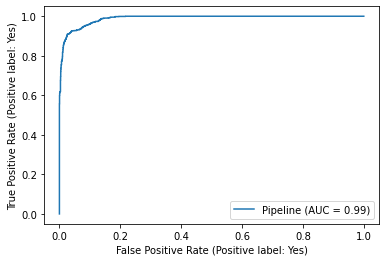

In [87]:
RocCurveDisplay.from_estimator(model, data_test, target_test)
plt.show()

Metric #3: Classification Matrix

In [88]:
cm = confusion_matrix(target, model.predict(dataset), labels=model.classes_)
print(cm[0][0]/(cm[0][0]+cm[0][1]))

0.9889598441389761
